## Классификация при помощи CNN.
На занятии по классификации временных рядов мы разобрали подход, основанный на мере расстояния DTW. Другое семейство алгоритмов основано на вычислении признаков по скользящему окну, например, автоматическая генерация признаков при помощи CNN. В задании вам предлагается разработать baseline решение для классификации рядов из датасета human activity recognition (https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) при помощи CNN сети. В качестве базовой архитектуры будем использовать наработки с семинара по предсказанию при помощи CNN, где в последнем слое используется softmax в качестве функции активации.

In [1]:
from typing import Tuple

In [2]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.utils import to_categorical

### 1. Считаем данные  
- Фичи сразу решейпнем, добавив размерность для свёрточного слоя  
- Лейблы принимают значения от 1 до 6. Для корректного расчёта моделью мы отнимем от ниx 1 (превратим в range(6)) и заэнкодим в категориальный таргет.

In [3]:
def read_data(train_or_test: str) -> Tuple[np.array, np.array]:
    a = []
    with open(f'../data/UCI_HAR_dataset/{train_or_test}/X_{train_or_test}.txt', 'r') as f:
        for line in f:
            a.append([float(i) for i in line.strip().split()])

    X = np.vstack(a)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    y = to_categorical(
        np.loadtxt(f'../data/UCI_HAR_dataset/{train_or_test}/y_{train_or_test}.txt', delimiter=' ') - 1
    )
    
    return X, y

In [3]:
X_train, y_train = read_data('train')
X_test, y_test = read_data('test')

NameError: name 'read_data' is not defined

In [5]:
y_test.shape

(2947, 6)

In [6]:
y_train.shape

(7352, 6)

<AxesSubplot:>

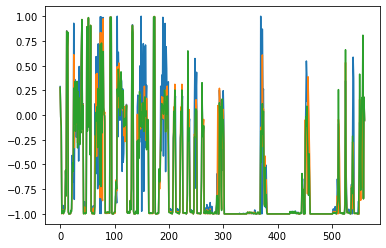

In [7]:
pd.Series(X_train[0].flatten()).plot()
pd.Series(X_train[1].flatten()).plot()
pd.Series(X_train[2].flatten()).plot()

In [8]:
y_train[1], y_train[2], y_train[3]

(array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0.], dtype=float32))

### 2. Постройте базовую CNN модель.

In [12]:
!pip install tqdm

     |████████████████████████████████| 81kB 1.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import Callback
from tqdm.notebook import tqdm

1. Задайте модель Sequential
2. Добавьте входной сверточный слой Conv1D (укажите нужный input_shape)
3. Добавьте слой Flatten, чтобы можно было передать выход со сверточного слоя на вход полносвязному
4. Добавьте полносвязный слой с софтмаксом
5. Соберите модель, в качестве метода оптимизации укажите adam, в качестве функции потерь категориальную кроссэнтропию.
6. Обучите модель
7. Сделайте прогноз и выведите classification_report

In [12]:
X_train.shape

(7352, 561, 1)

In [45]:
# your code here
model = Sequential()
model.add(Conv1D(32, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(  optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
EPOCHS = 100
model.fit(X_train, y_train, epochs=EPOCHS)
# your code here

Epoch 1/100
230/230 [==============================] - 8s 33ms/step - loss: 0.3157 - accuracy: 0.8806
Epoch 2/100
230/230 [==============================] - 8s 33ms/step - loss: 0.0867 - accuracy: 0.9686
Epoch 3/100
230/230 [==============================] - 8s 33ms/step - loss: 0.0544 - accuracy: 0.9797
Epoch 4/100
230/230 [==============================] - 8s 33ms/step - loss: 0.0447 - accuracy: 0.9820
Epoch 5/100
230/230 [==============================] - 8s 34ms/step - loss: 0.0403 - accuracy: 0.9852
Epoch 6/100
230/230 [==============================] - 8s 36ms/step - loss: 0.0374 - accuracy: 0.9860
Epoch 7/100
230/230 [==============================] - 8s 37ms/step - loss: 0.0285 - accuracy: 0.9891
Epoch 8/100
230/230 [==============================] - 8s 33ms/step - loss: 0.0269 - accuracy: 0.9903
Epoch 9/100
230/230 [==============================] - 8s 34ms/step - loss: 0.0236 - accuracy: 0.9918
Epoch 10/100
230/230 [==============================] - 7s 32ms/step - loss: 0.031

In [48]:
pred = model.predict(X_test)

In [91]:
np.argmax(pred)

4

In [100]:
from sklearn.metrics import classification_report

print (classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), target_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']))
# your code here

                    precision    recall  f1-score   support

           WALKING       0.96      0.98      0.97       496
  WALKING_UPSTAIRS       0.94      0.96      0.95       471
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
           SITTING       0.98      0.89      0.93       491
          STANDING       0.91      0.98      0.94       532
            LAYING       1.00      0.99      1.00       537

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



### 3. Попробуйте добавить дополнительный свероточный слой, MaxPooling, и пару промежуточных полносвязный слоев. 

In [101]:
# your code here
model = Sequential()
model.add(Conv1D(32, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(  optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [102]:
EPOCHS = 100
pred_pool = model.fit(X_train, y_train, epochs=EPOCHS)
# your code here

Epoch 1/100
230/230 [==============================] - 7s 31ms/step - loss: 0.4707 - accuracy: 0.8070
Epoch 2/100
230/230 [==============================] - 7s 31ms/step - loss: 0.1290 - accuracy: 0.9514
Epoch 3/100
230/230 [==============================] - 7s 31ms/step - loss: 0.0765 - accuracy: 0.9705
Epoch 4/100
230/230 [==============================] - 7s 30ms/step - loss: 0.0584 - accuracy: 0.9784
Epoch 5/100
230/230 [==============================] - 7s 30ms/step - loss: 0.0535 - accuracy: 0.9800
Epoch 6/100
230/230 [==============================] - 7s 30ms/step - loss: 0.0417 - accuracy: 0.9846
Epoch 7/100
230/230 [==============================] - 7s 30ms/step - loss: 0.0387 - accuracy: 0.9846
Epoch 8/100
230/230 [==============================] - 7s 29ms/step - loss: 0.0272 - accuracy: 0.9903
Epoch 9/100
230/230 [==============================] - 7s 30ms/step - loss: 0.0273 - accuracy: 0.9910
Epoch 10/100
230/230 [==============================] - 7s 30ms/step - loss: 0.026

In [108]:
pred_pool = model.predict(X_test)

In [109]:
from sklearn.metrics import classification_report
print (classification_report(np.argmax(y_test, axis=1), np.argmax(pred_pool, axis=1), target_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']))
# your code here

                    precision    recall  f1-score   support

           WALKING       0.94      1.00      0.97       496
  WALKING_UPSTAIRS       0.91      0.96      0.93       471
WALKING_DOWNSTAIRS       1.00      0.86      0.93       420
           SITTING       0.99      0.83      0.90       491
          STANDING       0.86      0.99      0.92       532
            LAYING       1.00      1.00      1.00       537

         micro avg       0.94      0.94      0.94      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.95      0.94      0.94      2947



### 4. Попробуйте сравнить качество с базовым dtw, используя fastdtw.

In [110]:
import fastdtw

#### Напишите функцию get_label, возвращающую соответсвующий класс для ряда из X_test
* принимает на вход ряд из X_test
* проходится по всем рядам из X_train
* считает dtw
* возвращает y из y_train, соответвующий минимальному dtw

In [25]:
def get_label(ts_test: np.array) -> np.array:
    # your code here
    
    return min_y

In [1]:
def get_label(ts, X_train, y_train):
    for ts_ref, y_ref in zip(X_train, y_train):
        min_dtw = np.inf
        min_y = None
        dtw, _ = fastdtw.fastdtw(ts.flatten(), ts_ref.flatten())
        if dtw < min_dtw:
            min_dtw = dtw
            min_y = y_ref
    return min_y

In [2]:
labels_fast=[]
for i in range(0, 20):
    labels_fast.append(get_label(X_test[i], X_train, y_train))

NameError: name 'X_test' is not defined

#### Пройдитесь по 50-100 рядам из X_test (примерное время 5-15 минут) и оцените точность классификации

In [26]:
# your code here